In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
adata = sc.read_visium("/home/aathira/BENG207/sc-analysis-hlca/sclc")
adata.var_names_make_unique("var")
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

/home/aathira/anaconda3/envs/sclc/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/aathira/anaconda3/envs/sclc/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [149]:
adata.var_names_make_unique()


In [150]:
adata

AnnData object with n_obs × n_vars = 6195 × 18085
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'spatial'

In [151]:

adata.obs


,in_tissue,array_row,array_col,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt
AACAATCCGAGTGGAC-1,1,103,47,11981,9.391161,115467.0,11.656749,28.299861,31.936397,36.186963,44.106108,7015.0,8.855948,6.075329
AACAATGGAACCACAT-1,1,54,32,9371,9.145482,47607.0,10.770756,28.888609,32.291470,36.650072,44.913563,3559.0,8.177516,7.475791
AACACCAGCCTACTCG-1,1,31,39,9567,9.166179,60219.0,11.005760,29.963965,33.658812,38.069380,46.566698,4265.0,8.358432,7.082482
AACACCATTCGCATAC-1,1,53,139,11195,9.323312,101700.0,11.529793,31.485742,35.090462,39.164208,46.945919,8782.0,9.080573,8.635201
AACACCGAGCTTGGAT-1,1,56,24,9977,9.208138,62929.0,11.049778,28.956443,32.530312,36.827218,45.049182,4921.0,8.501471,7.819924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGTTGCTCGATGTCTG-1,1,93,17,11146,9.318926,111978.0,11.626066,28.935148,32.836807,37.355552,45.580382,7993.0,8.986446,7.138010
TGTTGGTGAGCGGACG-1,1,59,17,10600,9.268704,79370.0,11.281888,29.937004,33.648734,38.011843,46.036286,5902.0,8.683216,7.436059
TGTTGGTGCGCTTCGC-1,1,37,127,9998,9.210240,63602.0,11.060416,29.964467,33.621584,37.857300,46.102324,4653.0,8.445482,7.315808
TGTTGGTGCGGAATCA-1,1,83,87,10609,9.269552,94453.0,11.455868,31.313987,35.059765,39.363493,47.440526,6372.0,8.759826,6.746212


In [152]:
adata.var

,gene_ids,feature_types,genome,mt,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
SAMD11,ENSG00000187634,Gene Expression,GRCh38,False,2531,0.622276,0.483830,59.144471,3855.0,8.257385
NOC2L,ENSG00000188976,Gene Expression,GRCh38,False,5472,2.863761,1.351641,11.670702,17741.0,9.783690
KLHL17,ENSG00000187961,Gene Expression,GRCh38,False,1766,0.356578,0.304965,71.493140,2209.0,7.700748
PLEKHN1,ENSG00000187583,Gene Expression,GRCh38,False,616,0.105892,0.100652,90.056497,656.0,6.487684
PERM1,ENSG00000187642,Gene Expression,GRCh38,False,568,0.096207,0.091856,90.831316,596.0,6.391917
...,...,...,...,...,...,...,...,...,...,...
MT-ND4L,ENSG00000212907,Gene Expression,GRCh38,True,6194,293.124451,5.684003,0.016142,1815906.0,14.412096
MT-ND4,ENSG00000198886,Gene Expression,GRCh38,True,6193,458.017426,6.129088,0.032284,2837418.0,14.858405
MT-ND5,ENSG00000198786,Gene Expression,GRCh38,True,6190,109.063919,4.701061,0.080710,675651.0,13.423433
MT-ND6,ENSG00000198695,Gene Expression,GRCh38,True,6188,50.422436,3.940074,0.112994,312367.0,12.651937


<Axes: xlabel='n_genes_by_counts', ylabel='Count'>

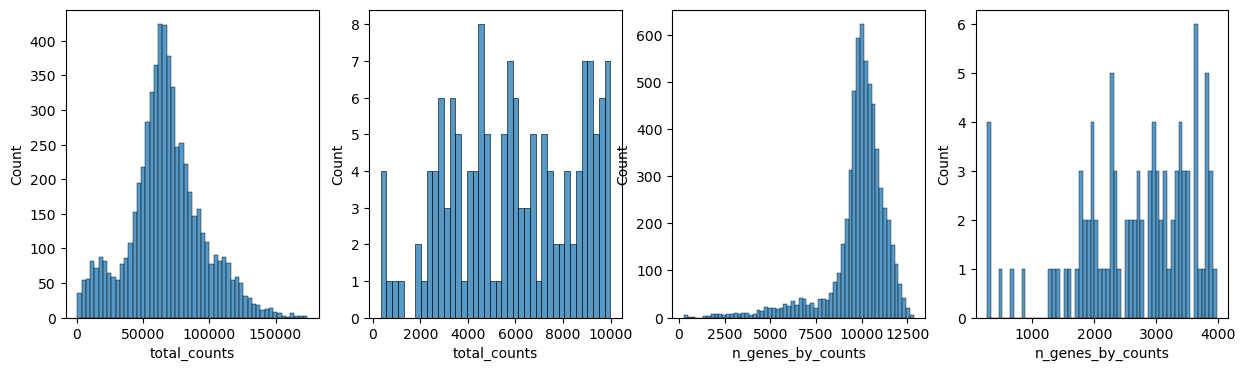

In [153]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.histplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.histplot(
    adata.obs["total_counts"][adata.obs["total_counts"] < 10000],
    kde=False,
    bins=40,
    ax=axs[1],
)
sns.histplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.histplot(
    adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 4000],
    kde=False,
    bins=60,
    ax=axs[3],
)

In [154]:
sc.pp.filter_cells(adata, min_counts=5000)
sc.pp.filter_cells(adata, max_counts=35000)
adata = adata[adata.obs["pct_counts_mt"] < 20].copy()
print(f"#cells after MT filter: {adata.n_obs}")
sc.pp.filter_genes(adata, min_cells=10)

#cells after MT filter: 644


In [155]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)

In [156]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="clusters", directed=False, n_iterations=-1)


/home/aathira/anaconda3/envs/sclc/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


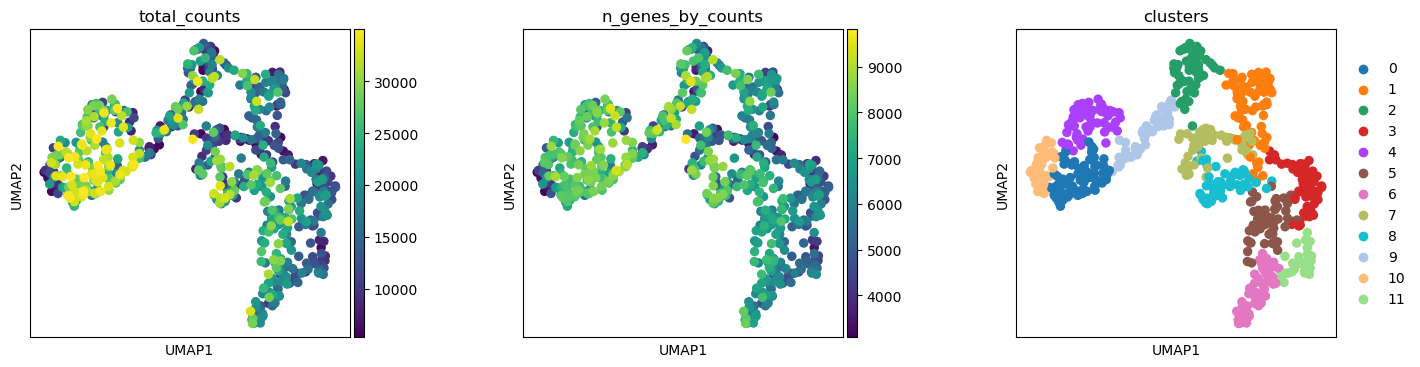

In [157]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts", "clusters"], wspace=0.4)

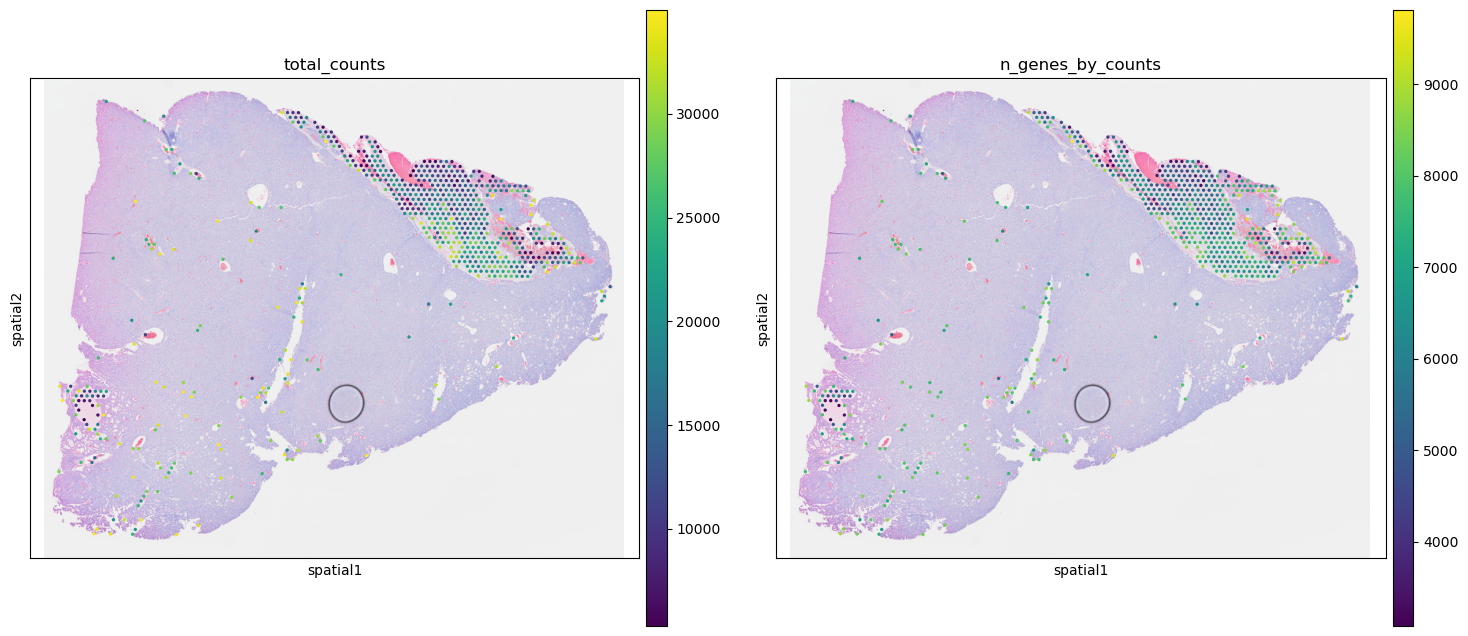

In [158]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, img_key="hires",color=["total_counts", "n_genes_by_counts"])
#adata.uns

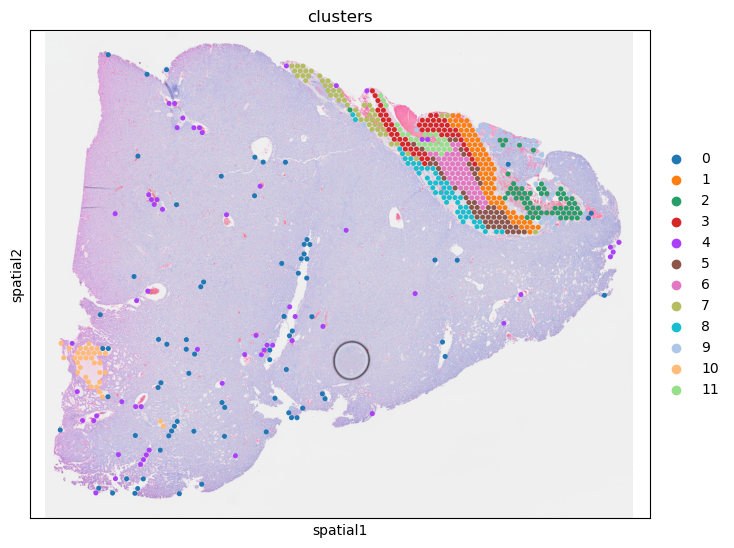

In [159]:
sc.pl.spatial(adata, img_key="hires", color="clusters", size=1.5)


categories: 0, 1, 2, etc.
var_group_labels: 1


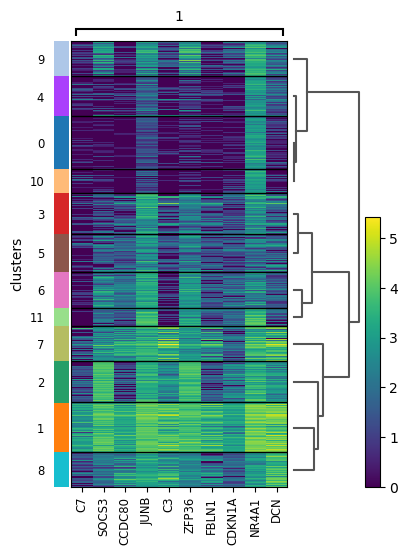

In [177]:
sc.tl.rank_genes_groups(adata, "clusters", method="t-test")
sc.pl.rank_genes_groups_heatmap(adata, groups="1", n_genes=10, groupby="clusters")

In [161]:
import scanpy as sc
import anndata as an
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanorama
import squidpy as sq

from pathlib import Path

In [183]:
# load the pre-processed dataset
img = "BENG207/sc-analysis-hlca/sclc/spatial/cytassist_image.tiff"
img 
img = sq.im.ImageContainer("BENG207/sc-analysis-hlca/sclc/spatial/cytassist_image.tiff")
print(img)
print(adata.obsm["spatial"])
print(img.shape)  # Assuming 'img' is your image object
img.compute()

ImageContainer[shape=(11757, 11291), layers=['image']]
[[18375  3413]
 [27664  6345]
 [20370  5013]
 ...
 [28006  8876]
 [13742 10641]
 [29444 11417]]
(11757, 11291)


ImageContainer[shape=(11757, 11291), layers=['image']]

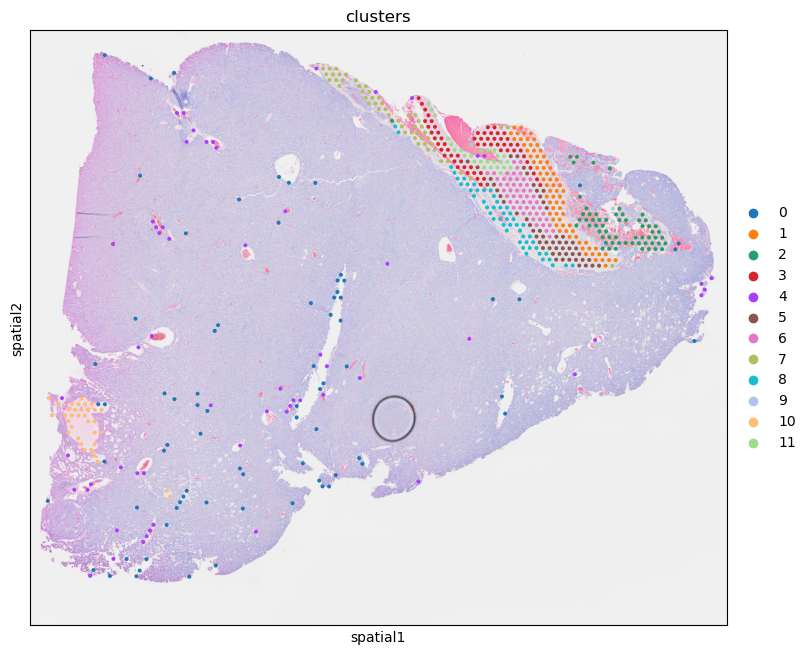

In [184]:
sq.pl.spatial_scatter(adata, color="clusters")

In [193]:
print(adata.uns)
scale = adata.uns['spatial']['CytAssist_11mm_FFPE_Human_Lung_Cancer']['scalefactors']['tissue_hires_scalef']
scale = 0.15580368

OrderedDict([('spatial', {'CytAssist_11mm_FFPE_Human_Lung_Cancer': {'images': {'hires': array([[[0.9411765 , 0.94509804, 0.9490196 ],
        [0.94509804, 0.94509804, 0.9490196 ],
        [0.94509804, 0.94509804, 0.9490196 ],
        ...,
        [0.9411765 , 0.9411765 , 0.9490196 ],
        [0.9411765 , 0.9411765 , 0.94509804],
        [0.9411765 , 0.9411765 , 0.94509804]],

       [[0.9411765 , 0.94509804, 0.9490196 ],
        [0.94509804, 0.94509804, 0.9490196 ],
        [0.94509804, 0.94509804, 0.94509804],
        ...,
        [0.9411765 , 0.9411765 , 0.94509804],
        [0.9411765 , 0.94509804, 0.94509804],
        [0.9411765 , 0.9411765 , 0.9490196 ]],

       [[0.9411765 , 0.94509804, 0.9490196 ],
        [0.9411765 , 0.94509804, 0.94509804],
        [0.94509804, 0.94509804, 0.9490196 ],
        ...,
        [0.9411765 , 0.9411765 , 0.94509804],
        [0.9411765 , 0.9411765 , 0.94509804],
        [0.9411765 , 0.9411765 , 0.94509804]],

       ...,

       [[0.9411765 , 0.945

In [196]:
sq.im.calculate_image_features(
    adata, img, features="summary", key_added="features", show_progress_bar=False, scale=scale
)


ValueError: Expected `width` to be in interval `[0, 11291]`, found `18375`.

In [186]:
# calculate features for different scales (higher value means more context)

feature_name = f"features_summary_scale{scale}"
sq.im.calculate_image_features(
        adata,
        img.compute(),
        features="summary",
        key_added=feature_name,
        n_jobs=4,
        scale=scale,
    )

  0%|          | 0/644 [00:00<?, ?/s]

ValueError: Expected `width` to be in interval `[0, 11291]`, found `18375`.